<a href="https://colab.research.google.com/github/youssefm15/CNN_Currency_Reader/blob/master/CNN_Currency_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

# Accessing My Google Drive
drive.mount('/content/drive')  # access my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pip install keras

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
target_size=(256,256) #provided by network resizing

In [ ]:
#manipulating for training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Classifing, identifing directories, batch size 

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Multimedia project',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Multimedia project', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 45 images belonging to 12 classes.
Found 5 images belonging to 12 classes.


In [ ]:
train_generator.image_shape 

(256, 256, 3)

In [ ]:
train_generator.class_indices #checking on training classes

{'10 back': 0,
 '10 front': 1,
 '100 back': 2,
 '100 front': 3,
 '20 back': 4,
 '20 front': 5,
 '200 back': 6,
 '200 front': 7,
 '5 back': 8,
 '5 front': 9,
 '50 back': 10,
 '50 front': 11}

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(64,activation='relu'),
   tf.keras.layers.Dropout(rate=0.5),
   tf.keras.layers.Dense(12, activation='softmax')
])

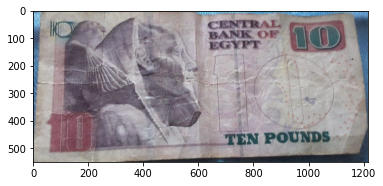

In [ ]:
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg')
plt.imshow(img1)
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# EPOCHS = 20
EPOCHS = 250
INIT_LR = 1e-3
BS = 32

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)],
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/250
1/1 [==============================] - 36s 36s/step - loss: 0.6806 - accuracy: 0.0625
Epoch 2/250
1/1 [==============================] - 2s 2s/step - loss: 0.6270 - accuracy: 0.1250
Epoch 3/250
1/1 [==============================] - 2s 2s/step - loss: 0.5238 - accuracy: 0.2188
Epoch 4/250
1/1 [==============================] - 1s 1s/step - loss: 0.5218 - accuracy: 0.0000e+00
Epoch 5/250
1/1 [==============================] - 2s 2s/step - loss: 0.5059 - accuracy: 0.0938
Epoch 6/250
1/1 [==============================] - 0s 439ms/step - loss: 0.5069 - accuracy: 0.1538
Epoch 7/250
1/1 [==============================] - 2s 2s/step - loss: 0.4855 - accuracy: 0.0625
Epoch 8/250
1/1 [==============================] - 2s 2s/step - loss: 0.4460 - accuracy: 0.0938
Epoch 9/250
1/1 [==============================] - 1s 538ms/step - loss: 0.4442 - accuracy: 0.0000e+00
Epoch 10/250
1/1 [==============================] - 1s 651ms/step - loss: 0.4143 - accuracy: 0.1538
Epoch 11/250
1/1 [==

dict_keys(['loss', 'accuracy'])
{'loss': [0.680617094039917, 0.6270077228546143, 0.5238004922866821, 0.5217661261558533, 0.5059105157852173, 0.5069456100463867, 0.48554450273513794, 0.4459567666053772, 0.44422823190689087, 0.4142577052116394, 0.43236416578292847, 0.46666842699050903, 0.4593997895717621, 0.48725560307502747, 0.4925228953361511, 0.41354256868362427, 0.3982104957103729, 0.4785911738872528, 0.4221426248550415, 0.3703973591327667, 0.393714964389801, 0.38331139087677, 0.3947787880897522, 0.4127502143383026, 0.36027806997299194, 0.476199746131897, 0.41860654950141907, 0.39952531456947327, 0.40171223878860474, 0.37749576568603516, 0.4181658625602722, 0.40788090229034424, 0.38292428851127625, 0.35690492391586304, 0.3698984980583191, 0.38961923122406006, 0.3823089003562927, 0.4086526036262512, 0.3620222210884094, 0.3669414520263672, 0.3580440282821655, 0.38290682435035706, 0.3451085388660431, 0.37570565938949585, 0.37730127573013306, 0.37086427211761475, 0.36293214559555054, 0.3

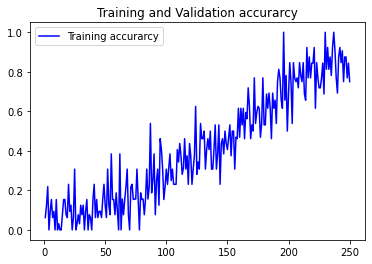

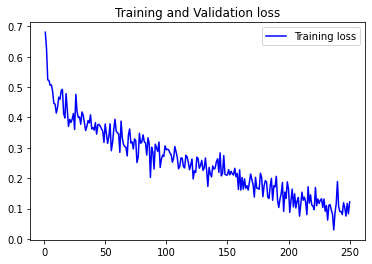

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

accuracy = history.history['accuracy']
print(history.history)
# val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
# plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('money.h5')

# New Section

In [ ]:
model.save_weights('coins.h5')

In [ ]:
#import tensorflowjs as tfjs
#tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Multimedia project/")

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'10 back': 0,
 '10 front': 1,
 '100 back': 2,
 '100 front': 3,
 '20 back': 4,
 '20 front': 5,
 '200 back': 6,
 '200 front': 7,
 '5 back': 8,
 '5 front': 9,
 '50 back': 10,
 '50 front': 11}

In [ ]:
Classes = ["10 Back","10 Front","100 Back","100 Front","20 Back","20 Front","200 Back","200 Front","5 Back","5 Front","50 Back","50 Front"]

10 Back


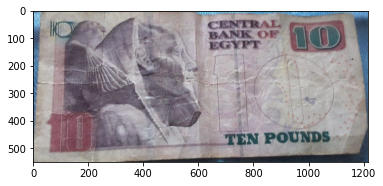

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width=256
img_height=256


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)


result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg')
plt.imshow(coin)
print (Classes[int(result)])

10 Front


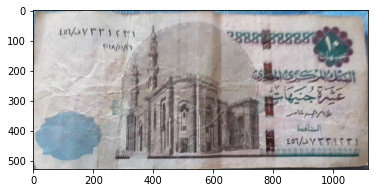

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/10 front/10.0.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/10 front/10.0.jpg')
plt.imshow(coin)
print (Classes[int(result)])

100 Back


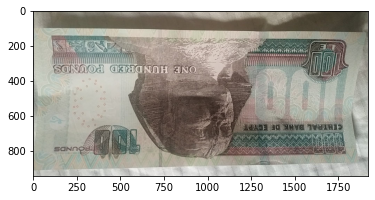

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/100 back/100.3.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/100 back/100.3.jpg')
plt.imshow(coin)
print (Classes[int(result)])

100 Front


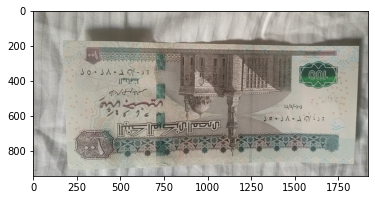

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/100 front/100.2.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/100 front/100.2.jpg')
plt.imshow(coin)
print (Classes[int(result)])

20 Back


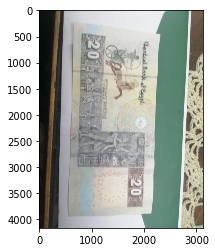

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/20 back/20 back.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/20 back/20 back.jpg')
plt.imshow(coin)
print (Classes[int(result)])

20 Front


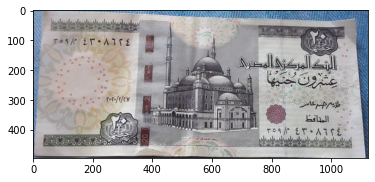

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/20 front/20.0.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/20 front/20.0.jpg')
plt.imshow(coin)
print (Classes[int(result)])

200 Back


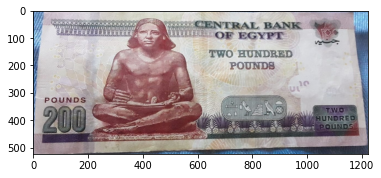

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/200 back/200.1.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/200 back/200.1.jpg')
plt.imshow(coin)
print (Classes[int(result)])

200 Front


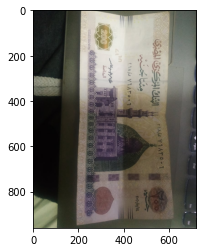

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/200 front/200.3.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/200 front/200.3.jpg')
plt.imshow(coin)
print (Classes[int(result)])

5 Back


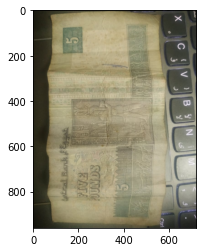

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/5 back/5.0.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/5 back/5.0.jpg')
plt.imshow(coin)
print (Classes[int(result)])

5 Front


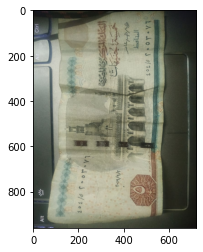

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/5 front/5.1.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/5 front/5.1.jpg')
plt.imshow(coin)
print (Classes[int(result)])

50 Back


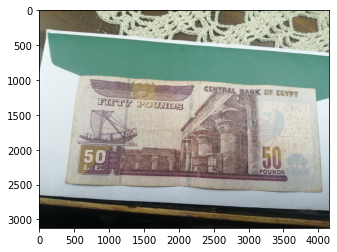

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/50 back/50 back.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/50 back/50 back.jpg')
plt.imshow(coin)
print (Classes[int(result)])

50 Front


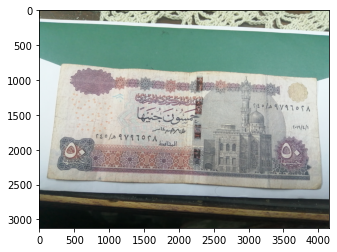

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/50 front/50 front.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/50 front/50 front.jpg')
plt.imshow(coin)
print (Classes[int(result)])